In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7,7) # Make the figures a bit bigger

from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.utils import np_utils



Using TensorFlow backend.


In [4]:
nb_classes = 10

# the data, shuffled and split between tran and test sets
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)



170508288/170498071 [==============================] - 55s 0us/step
('X_train original shape', (50000, 32, 32, 3))
('y_train original shape', (50000, 1))


In [11]:
X_train = X_train.reshape(50000, 3072)
X_test = X_test.reshape(10000, 3072)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

('Training matrix shape', (50000, 3072))
('Testing matrix shape', (10000, 3072))


In [12]:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [19]:
model = Sequential()
model.add(Dense(2304, input_shape=(3072,)))
model.add(Activation('relu')) # An "activation" is just a non-linear function applied to the output
                              # of the layer above. Here, with a "rectified linear unit",
                              # we clamp all values below 0 to 0.
                           
model.add(Dropout(0.2))   # Dropout helps protect the model from memorizing or "overfitting" the training data
model.add(Dense(2304))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax')) # This special "softmax" activation among other things,
                                 # ensures the output is a valid probaility distribution, that is
                                 # that its values are all non-negative and sum to 1.
        

In [20]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'] )

In [21]:
model.fit(X_train, Y_train,
          batch_size=128, nb_epoch=4, verbose=1,
          validation_data=(X_test, Y_test))

/home/tushar/ML-env-py2/lib/python2.7/site-packages/ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until


Train on 50000 samples, validate on 10000 samples
Epoch 1/4
50000/50000 [==============================] - 9s 189us/step - loss: 2.0710 - acc: 0.2839 - val_loss: 1.7921 - val_acc: 0.3475
Epoch 2/4
50000/50000 [==============================] - 8s 150us/step - loss: 1.8007 - acc: 0.3438 - val_loss: 1.7050 - val_acc: 0.3868
Epoch 3/4
50000/50000 [==============================] - 7s 150us/step - loss: 1.7558 - acc: 0.3600 - val_loss: 1.6741 - val_acc: 0.4001
Epoch 4/4
50000/50000 [==============================] - 8s 151us/step - loss: 1.7244 - acc: 0.3723 - val_loss: 1.6695 - val_acc: 0.4070


In [29]:
model.fit(X_train, Y_train,
          batch_size=128, nb_epoch=4, verbose=1,
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/4
  512/60000 [..............................] - ETA: 18s - loss: 0.0885 - acc: 0.9805

/home/vandna/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until


60000/60000 [==============================] - 14s 228us/step - loss: 0.0747 - acc: 0.9769 - val_loss: 0.0827 - val_acc: 0.9745
Epoch 2/4
60000/60000 [==============================] - 16s 258us/step - loss: 0.0696 - acc: 0.9785 - val_loss: 0.0763 - val_acc: 0.9766
Epoch 3/4
60000/60000 [==============================] - 14s 229us/step - loss: 0.0637 - acc: 0.9801 - val_loss: 0.0743 - val_acc: 0.9760
Epoch 4/4
60000/60000 [==============================] - 14s 226us/step - loss: 0.0594 - acc: 0.9818 - val_loss: 0.0726 - val_acc: 0.9776


In [23]:
score = model.evaluate(X_test, Y_test,
                       verbose=0)
print('Test score:', score)

('Test score:', [1.6695376638412476, 0.407])


In [24]:
predicted_classes = model.predict_classes(X_test)

# Check which items we got right / wrong
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

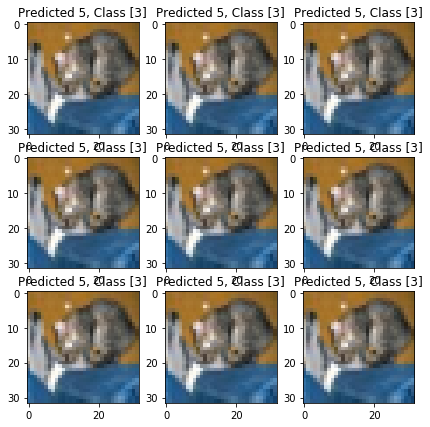

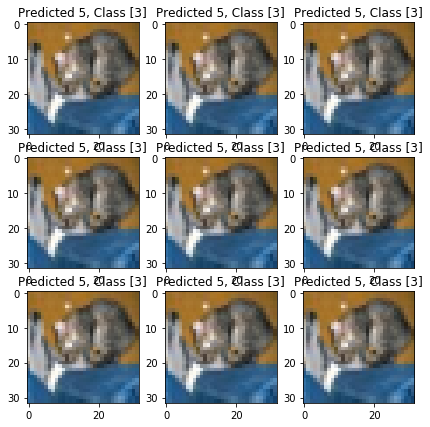

In [26]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(32,32,3), interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(32,32,3),  interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))

ValueError: cannot reshape array of size 3072 into shape (28,28)

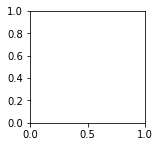

In [27]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))